In [1]:
import re
import sys
print(sys.version)
import time
import glob
import matplotlib.pyplot as plt

3.6.6 | packaged by conda-forge | (default, Oct 12 2018, 14:08:43) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


# download data

https://www.cs.cornell.edu/projects/kddcup/datasets.html

In [2]:
!ls -hal 2003/ | wc -l

1022


# load data

In [3]:
list_of_files = glob.glob('2003/*')

In [4]:
# how many files are in the corpus?
len(list_of_files)

1019

In [5]:
start_time=time.time()
regex_reslts={}
number_of_eq=0
for this_file in list_of_files:
    with open(this_file,'rb') as f:
        data = f.read()
    
    resp = re.findall('\\\\begin\s*{(?:eqnarray|equation|multiline)}.*?end\s*{(?:eqnarray|equation|multiline)}',
                      str(data),
                      re.DOTALL)
#    print(this_file)
    for eq in resp:
        number_of_eq+=1
        try:
            regex_reslts[this_file].append(eq)
        except KeyError:
            regex_reslts[this_file]=[]
            regex_reslts[this_file].append(eq)
#        print('  ',eq,'\n')

print(round(time.time()-start_time,2),'seconds')

6.11 seconds


In [6]:
# number of matching candidates in .tex files
number_of_eq

29587

In [7]:
# first file results
regex_reslts[list(regex_reslts.keys())[0]]

['\\begin{equation}}\\n\\\\newcommand{\\\\eeq}{\\\\end{equation}',
 '\\begin{eqnarray}}\\n\\\\newcommand{\\\\eeqa}{\\\\end{eqnarray}']

# visualize

## number of expressions per document

In [8]:
number_of_eq_per_file=[]
for filename,list_of_expr in regex_reslts.items():
    number_of_eq_per_file.append(len(list_of_expr))

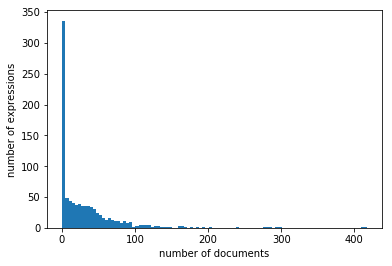

In [9]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')

### use a log-y scale since there is a lot of variation

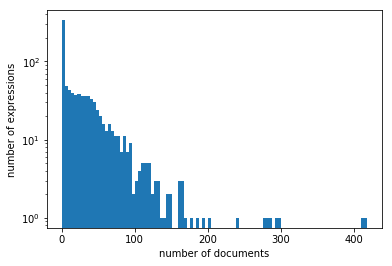

In [10]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.yscale('log', nonposy='clip')
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')

## length of expressions

In [11]:
expr_len=[]
for filename,list_of_expr in regex_reslts.items():
    for expr in list_of_expr:
        expr_len.append(len(expr))
        if len(expr)>2000:
            print(filename)
            print(expr)
            print('\n')

2003/0303010
\begin {eqnarray}\n    B_{\\pi^i\\pi^j,\\pi^k\\pi^l}(t)\n    &=&\n    \\int \\frac{d^3\\k }{ (2\\pi)^3} \\>\n    \\left[ \\vphantom{\\half}\n\tA_{\\pi^i\\pi^k}(t,\\k) \\, A_{\\pi^j\\pi^l}(t,-\\k)\n\t+\n\tA_{\\pi^i\\pi^l}(t,\\k) \\, A_{\\pi^j\\pi^k}(t,-\\k)\n\t%(k\\leftrightarrow l) \\vphantom{\\half}\n    \\right]\n\\nonumber\\\\ &\\sim&\n    \\frac{\\bar\\enthalpy^2 \\, T^2 }{ 15}\n    \\left[\n\t\\frac{\n\t    \\delta^{ij} \\delta^{kl} +\n\t    \\delta^{ik} \\delta^{jl} +\n\t    \\delta^{il} \\delta^{jk}\n\t}{\n\t    (4 \\pi \\gamma_s |t|)^{3/2}\n\t}\n\t+\n\t\\frac{\n\t    2 \\, \\delta^{ij} \\delta^{kl} +\n\t    7 \\, ( \\delta^{ik} \\delta^{jl} + \\delta^{il} \\delta^{jk} )\n\t}{\n\t     \\, (8 \\pi \\gamma_\\eta |t|)^{3/2}\n\t}\n    \\right] ,\n\\\\m]\n    B_{\\pi^i\\pi^j,\\vareps\\vareps}(t)\n    &=&\n    B_{\\vareps\\vareps,\\pi^i\\pi^j}(t)\n    =\n    \\int \\frac{d^3\\k }{ (2\\pi)^3} \\;\\;\n    %\\left[ \\vphantom {\\half} \\,\n\t2 \\, A_{\\pi^i\\vareps}(t,\\k) \

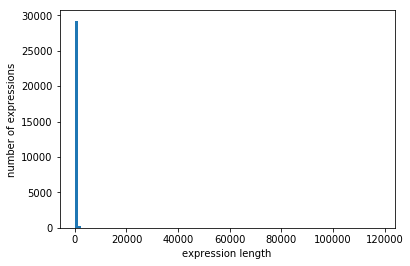

In [12]:
_=plt.hist(expr_len,bins=100)
_=plt.ylabel('number of expressions')
_=plt.xlabel('expression length')